# Config

In [1]:
import os

**Change the content of the text in the path variable to store the path to the main folder**

In [2]:
path = '/mnt/storage/Documents/CentralePa/3A/Big Data and AI/DigitalClassification/'

In [3]:
os.chdir(path)
os.environ["Root_DIR"] = path

os.environ["Data_DIR"] = os.path.join(path,"Data")
os.environ["Data_Raw"] = os.path.join(os.environ["Data_DIR"],"Raw")
os.environ["Data_Processed"] = os.path.join(os.environ["Data_DIR"],"Processed")
os.environ["Data_Sample_Raw"] = os.path.join(os.environ["Data_DIR"],"Sample","Raw")
os.environ["Data_Sample_Processed"] = os.path.join(os.environ["Data_DIR"],"Sample","Processed")
os.environ["Data_Ref"] = os.path.join(os.environ["Data_DIR"],"Ref")

# Import File

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [5]:
file_name_sample_pickle = "sample_base_apprentissage_V4.pkl"
newPath = os.path.join(os.environ["Data_Sample_Processed"],
                                   file_name_sample_pickle)
df=pd.read_pickle(newPath)

In [5]:
file_name_full = "learning_base_preprocessed.pkl"
newPath = os.path.join(os.environ["Data_Processed"],
                                   file_name_full)
df=pd.read_pickle(newPath)

In [6]:
from sources.utils import load_object_pickle
file_name_model = "model.pkl"
path_model = os.path.join(os.environ["Data_Processed"],
                                   file_name_model)
model = load_object_pickle(path_model)

In [13]:
df.shape

(11000, 4)

# Modelling

In [8]:
from sources.model import Model

In [7]:
model = Model(df,'commentaire_brut', 'comment_preprossed', 'Motif')

In [8]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(max_iter=5, tol=None)

In [9]:
model.fill_dict('Stochastic Gradient Descent',SGD)

In [10]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
model.fill_dict('LinearSVC',LSVC)

In [11]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
model.fill_dict('Xgboost',XGB)

In [12]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
model.fill_dict('Random Forest Classifier',RFC)

In [13]:
model.dict_trained_models

                                                                                                                                                                                                                                                                                                                                                       
  3  bonjour suite changement d'adresse administratif le client n'est plus au 103 mais au 453 rue de ferin pour son installation internet. le client ne déménageant pas merci de faire la modif dans soft administrativement dans soft car du coup client recois tjs ses courrier identifiants au 103. cdt                                                                                                                                                                                                                                                                                                                                                                      

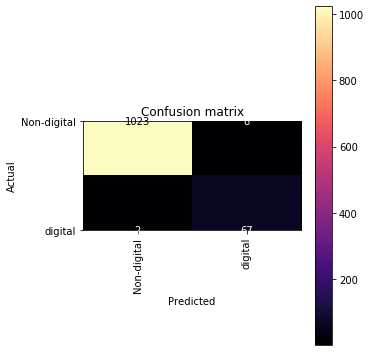

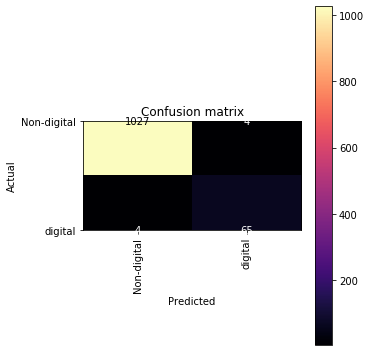

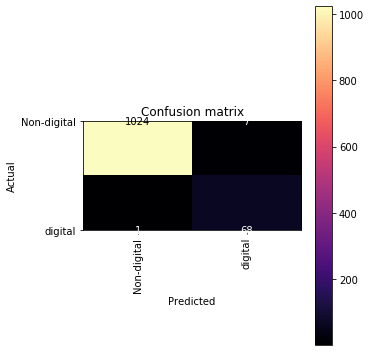

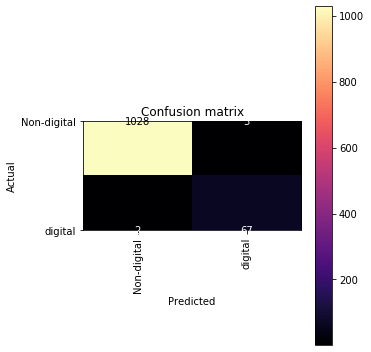

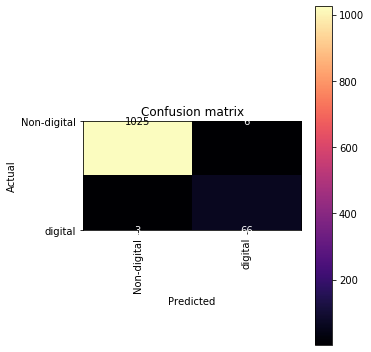

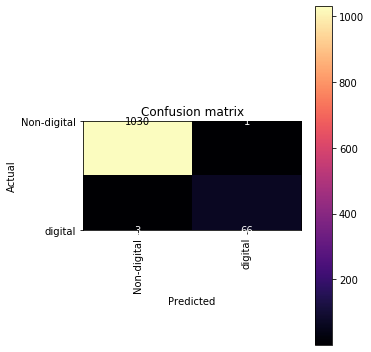

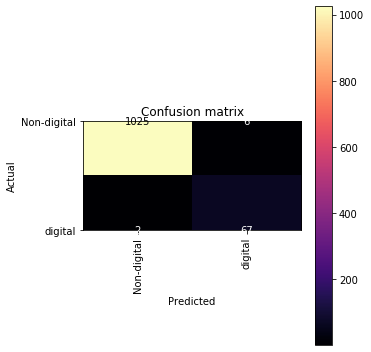

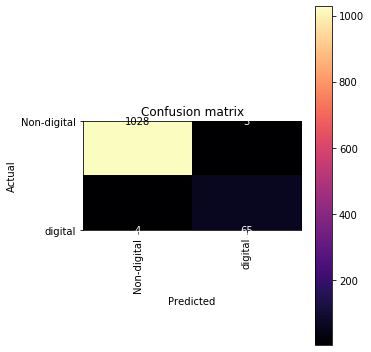

In [9]:
from sources.model import Model
for classifier in list(model.dict_trained_models.keys()):
    Model.plot_confusion_matrix(model.dict_trained_models[classifier]['confusion_matrix'])

In [16]:
# save model in pickle file
from sources.utils import save_object_pickle
file_name_full = "model.pkl"
newPath = os.path.join(os.environ["Data_Processed"],
                                   file_name_full)
save_object_pickle(newPath, model)